In [1]:
import pandas  as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [3]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [4]:
X = df.drop('class', axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:

parameters = {'n_estimators': [10,50,10], 'max_depth': [1,9,2], 'min_samples_leaf': [1,7],\
              'min_samples_split': [2,9,2]}
clf_rf = RandomForestClassifier(random_state=0)


# n_estimators: от 10 до 50 с шагом 10
# max_depth: от 1 до 12 с шагом 2
# min_samples_leaf: от 1 до 7
# min_samples_split: от 2 до 9 с шагом 2



clf = GridSearchCV(clf_rf, parameters, cv=3, verbose=1)
clf.fit(X, y)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    7.4s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 9, 2], 'min_samples_leaf': [1, 7],
                         'min_samples_split': [2, 9, 2],
                         'n_estimators': [10, 50, 10]},
             verbose=1)

In [6]:
best_params = clf.best_params_
best_params

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [7]:
best_clf = RandomForestClassifier(n_estimators= 10, max_depth= 9, min_samples_leaf= 1, min_samples_split= 2, random_state=0)
best_clf.fit(X,y)

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [8]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])

<AxesSubplot:>

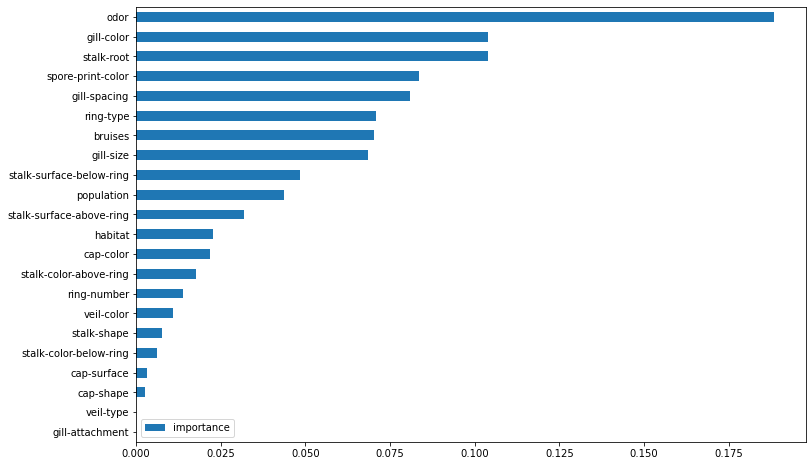

In [9]:
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8)) 

In [10]:
df_mush = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
df_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [11]:
clf_predict = pd.DataFrame(best_clf.predict(df_mush))

clf_predict.sum()


0    976
dtype: int64

In [12]:
from sklearn.metrics import confusion_matrix

df_mush_cor = pd.read_csv('testing_y_mush.csv')
df_mush_cor.head()

,class
0,0
1,0
2,1
3,1
4,1


<AxesSubplot:>

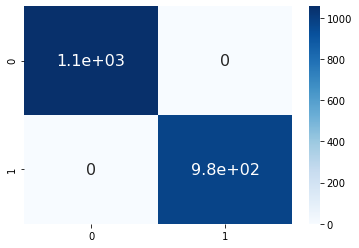

In [13]:
sns.heatmap(confusion_matrix(df_mush_cor, clf_predict), annot=True, cmap="Blues", annot_kws={"size": 16})